In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error
from data_preprocessing_final2 import *

In [3]:
#set columns
pd.set_option("display.max_columns",None)

#set rows
pd.set_option("display.max_rows",None)

### read our file and clean, re-classify, train/test split, and scale our data 

In [4]:
# read our original data file
data = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)

In [5]:
# taking only Normal Sale conditions to make apples to apples comparison for Sales Price (majority were Normal)
data = data[data['SaleCondition'] == 'Normal']

In [6]:
# read our original data file
data = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)

# this function will clean, dummify/ord, test/train split, and scale all our data
train_data_linear, train_target_linear, test_data_linear, test_target_linear, train_data_tree, train_target_tree, test_data_tree, test_target_tree = initiate_data(data)

In [50]:
train_data_tree.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotalBath,Bsmt_Unfin_Ratio,TotalLivArea
0,5.0,0.0,3.0,1.0,0.0,9.0,2.0,3.0,2.0,0.0,...,0.739130,0.325269,0.155193,0.105121,0.000000,0.0,0.0,0.166667,0.035628,0.285561
1,5.0,0.0,3.0,4.0,0.0,3.0,2.0,0.0,2.0,0.0,...,0.260870,0.141129,0.196033,0.000000,0.110672,0.0,0.0,0.000000,1.000000,0.173529
2,6.0,1.0,3.0,4.0,0.0,5.0,2.0,4.0,2.0,0.0,...,0.939130,0.282258,0.163361,0.000000,0.000000,0.0,0.0,0.166667,0.222877,0.182086
3,5.0,0.0,3.0,4.0,0.0,5.0,2.0,0.0,5.0,0.0,...,0.895652,0.363575,0.224037,0.113208,0.000000,0.0,0.0,0.250000,0.781440,0.381016
4,5.0,0.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,1.0,...,0.521739,0.174731,0.000000,0.000000,0.000000,0.0,0.0,0.166667,0.178506,0.248930


### new calling method for our train/test split and clean
- this will be a tree-based model

only using:
- train_tree_linear, train_tree_linear
- test_tree_linear, test_tree_linear

In [8]:
train_data_tree.shape

(2059, 56)

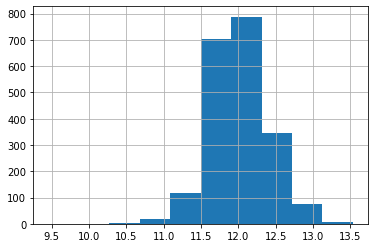

In [9]:
train_target_tree.hist()

In [10]:
# need to delete PID to run the Regression models
del train_data_tree['PID']
del test_data_tree['PID']

# model was built out using these variables so going to redefine our 
# train_data_linear, train_target_linear, test_data_linear, test_target_linear
x_train = train_data_tree
Y_train = train_target_tree

x_test = test_data_tree
Y_test = test_target_tree

# Decision Tree Model
- Fit a decision tree regressor with max_depth = 2
- Fit a decision tree regressor with max_depth = 1 to 25
- Then use GridSearch to find the best hyper-parameters


In [15]:
tree = DecisionTreeRegressor()

In [42]:
# max_depth=2
tree.set_params(max_depth=2, random_state=0)
tree.fit(x_train, Y_train)
train_error = tree.score(x_train, Y_train)
test_error = tree.score(x_test, Y_test)
print("The training score (max_depth=2) is: %.5f" %tree.score(x_train, Y_train))
print("The test     score (max_depth=2) is: %.5f" %tree.score(x_test, Y_test))

The training score (max_depth=2) is: 0.61118
The test     score (max_depth=2) is: 0.61336


### Setting our max_depth manually from 1-25
- printing out our train/test errors to see variations
- remember to set random_state = 0

In [30]:
#setting params max_depth=25
depth = list(range(1,26))

for num in depth:
    tree.set_params(max_depth=num, random_state=0)
    tree.fit(x_train, Y_train)
    train_score = tree.score(x_train, Y_train)
    test_score = tree.score(x_test, Y_test)
    print(tree.get_params)
    print("The training score is: %.5f" %train_score)
    print("The test     score is: %.5f" %test_score)
    
# depth=3-4 looks the best from a quick glance

<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=1, random_state=0)>
The training score is: 0.43206
The test     score is: 0.42494
<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=2, random_state=0)>
The training score is: 0.61118
The test     score is: 0.61336
<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=3, random_state=0)>
The training score is: 0.73432
The test     score is: 0.71929
<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=4, random_state=0)>
The training score is: 0.80240
The test     score is: 0.74202
<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=5, random_state=0)>
The training score is: 0.85092
The test     score is: 0.80099
<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=6, random_state=0)>
The training score is: 0.88811
The test     score is: 0.80502
<bound method BaseEstimator.get_params of DecisionTreeRegressor(

### Using GridSearch
- max_depth = 1-25

In [31]:
# setting hyper-tuning parameters
grid_para_tree = {'max_depth': range(1, 26)}

In [32]:
# remember to use accuracy for tree-based models
grid = GridSearchCV(tree, grid_para_tree, cv=5, scoring ='r2')
grid.fit(x_train, Y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=25, random_state=0),
             param_grid={'max_depth': range(1, 26)}, scoring='r2')

In [33]:
## best parameters
print(grid.best_params_) #max_depth=6 is the best

## best score
print(grid.best_score_) #best score of 0.789

{'max_depth': 6}
0.7885372093130838


### Feature Importance

In [34]:
# creating default graph settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14,14)

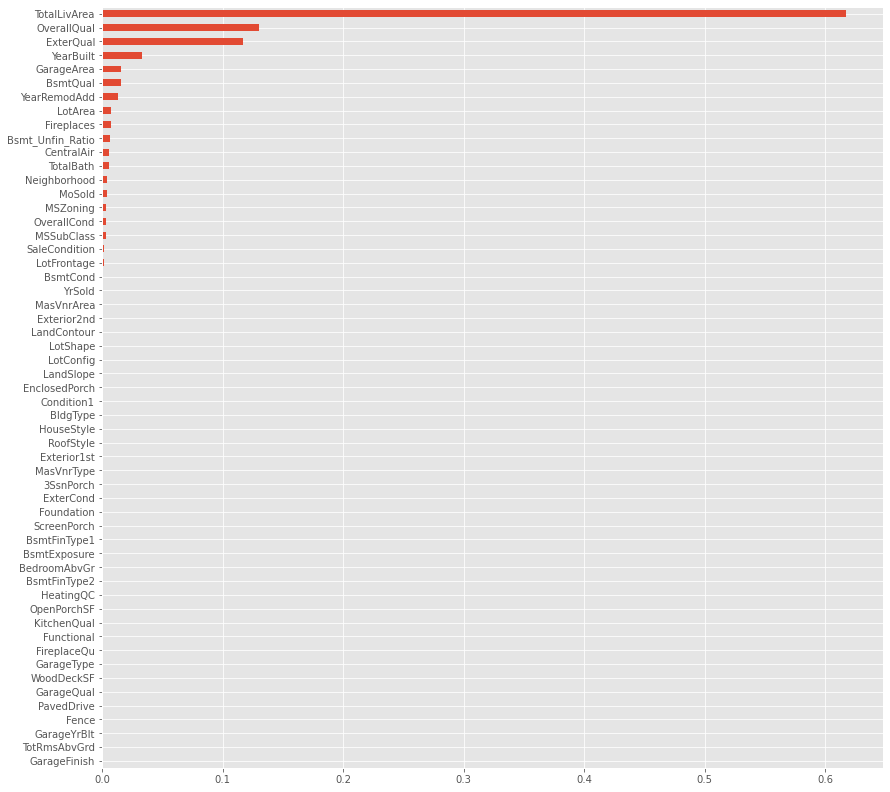

In [35]:
tree_final = grid.best_estimator_
feature_importance = pd.Series(tree_final.feature_importances_, index = x_train.columns).sort_values()
feature_importance.plot.barh()

In [36]:
feature_importance.sort_values(ascending=False)

TotalLivArea        0.617088
OverallQual         0.130581
ExterQual           0.116578
YearBuilt           0.033007
GarageArea          0.016036
BsmtQual            0.015604
YearRemodAdd        0.013357
LotArea             0.007547
Fireplaces          0.007409
Bsmt_Unfin_Ratio    0.006795
CentralAir          0.005937
TotalBath           0.005872
Neighborhood        0.004143
MoSold              0.003818
MSZoning            0.003714
OverallCond         0.003523
MSSubClass          0.003377
SaleCondition       0.002068
LotFrontage         0.001327
BsmtCond            0.000921
YrSold              0.000515
MasVnrArea          0.000437
Exterior2nd         0.000346
GarageType          0.000000
BsmtFinType2        0.000000
HeatingQC           0.000000
OpenPorchSF         0.000000
KitchenQual         0.000000
Functional          0.000000
FireplaceQu         0.000000
WoodDeckSF          0.000000
GarageQual          0.000000
BsmtExposure        0.000000
PavedDrive          0.000000
Fence         

# Random Forest

In [38]:
randomForest = RandomForestRegressor()

In [43]:
# max_depth=6 since our Decision Tree was optimized at 6
randomForest.set_params(max_depth=6, random_state=0)
randomForest.fit(x_train, Y_train)
train_error = 1 - randomForest.score(x_train, Y_train)
test_error = 1 - randomForest.score(x_test, Y_test)
print("The training score (max_depth=2) is: %.5f" %randomForest.score(x_train, Y_train))
print("The test     score (max_depth=2) is: %.5f" %randomForest.score(x_test, Y_test))

The training score (max_depth=2) is: 0.92421
The test     score (max_depth=2) is: 0.88276


### Using GridSearch
- max_depth = 1 to 25

In [44]:
# setting hyper-tuning parameters
grid_para_forest = {'max_depth': range(1, 26), 'n_estimators': range(10, 110, 10)}

In [45]:
# run the RF classifier through the grid search
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(x_train, Y_train)   # to track time

Wall time: 2min 23s


GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=6, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 26),
                         'n_estimators': range(10, 110, 10)},
             scoring='r2')

In [46]:
## best parameters
print(grid_search_forest.best_params_) #max_depth=22 is the best

## best score
print(grid_search_forest.best_score_) #best score of 0.887

{'max_depth': 22, 'n_estimators': 100}
0.886550667525559


In [47]:
# still a pretty wide gap between train/test
print("The train score is: %.5f" %grid_search_forest.best_estimator_.score(x_train, Y_train))
print("The test score  is: %.5f" %grid_search_forest.best_estimator_.score(x_test, Y_test))

The train score is: 0.98479
The test score  is: 0.90753


### Feature Importance

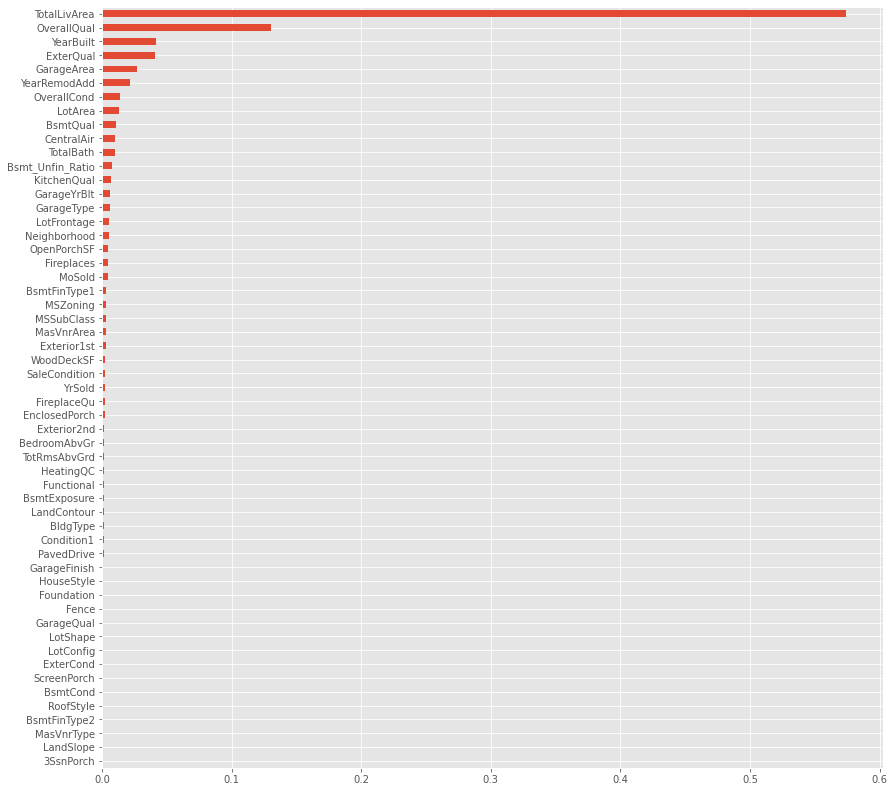

In [48]:
# feature importance sort
forest_final = grid_search_forest.best_estimator_
feature_importance = pd.Series(forest_final.feature_importances_, index = x_train.columns).sort_values(ascending=True)
feature_importance.plot.barh()

In [49]:
feature_importance.sort_values(ascending=False)

TotalLivArea        0.573960
OverallQual         0.130325
YearBuilt           0.041874
ExterQual           0.040734
GarageArea          0.027379
YearRemodAdd        0.021997
OverallCond         0.013788
LotArea             0.013127
BsmtQual            0.011107
CentralAir          0.010151
TotalBath           0.009697
Bsmt_Unfin_Ratio    0.007903
KitchenQual         0.006801
GarageYrBlt         0.006119
GarageType          0.005934
LotFrontage         0.005761
Neighborhood        0.005738
OpenPorchSF         0.004768
Fireplaces          0.004746
MoSold              0.004496
BsmtFinType1        0.003401
MSZoning            0.003253
MSSubClass          0.003242
MasVnrArea          0.002772
Exterior1st         0.002770
WoodDeckSF          0.002678
SaleCondition       0.002412
YrSold              0.002287
FireplaceQu         0.002125
EnclosedPorch       0.001968
Exterior2nd         0.001892
BedroomAbvGr        0.001882
TotRmsAbvGrd        0.001739
HeatingQC           0.001697
Functional    